<a href="https://colab.research.google.com/github/xinnazim/esaa/blob/main/%ED%8C%8C%EB%A8%B8%EC%99%84_ch4_1~5_(2_%EC%A0%9C%EC%99%B8).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 4. 분류

* 1. 분류의 개요 : 학습 데이터로 주어진 데이터의 피처와 레이블값을 머신러닝 알고리즘으로 학습해 모델 생성, 생성된 모델에 새로운 데이터 값이 주어졌을 때 미지의 레이블 값을 예측

 * 앙상블 방법
   * 배깅: 랜덤 포레스트(뛰어난 예측 성능, 상대적으로 빠른 수행 시간, 유연성)
   * 부스팅(뛰어난 예측 성능, but 오래걸림-> 발전 시켜 활용도 높임)

* 2. 결정트리: ML 알고리즘 중 직관적으로 이해하기 쉬운 알고리즘, 규칙을 학습해 자동으로 찾아내 트리기반의 분류기준을 만듦

  * 적은 결정 노드로 높은 예측 정확도 가지려면 트리를 잘 분할하여 균일한 데이터 세트를 구성하게 해야함

  * 결정노드는 정보 균일도가 높은 데이터세트를 먼저 선택하도록 규칙 조건을 만든다. 정보의 균일도 측정 방법은 정보이득 지수, 지니계수가 있다.정보 이득 높은 속성 기준으로 분류 

    * 정보이득: 엔트로피 기반, 1- 엔트로피(주어진 데이터 집합의 혼잡도)
    * 지니계수: 경제학에서 불평등 지수, 1로 갈수록 불평등, 지니계수 낮은 속성으로 분할 

* 결정 트리 모델 특징
  * 장점: 균일도 기반이라 쉽고 직관적
  * 단점: 과적합으로 정확도 떨어짐

  * 클래스
    * DecisionTreeClassifier: 분류를 위한 클래스
    * DecisionTreeRegressor: 회귀를 위한 클래스
  * 파라미터
    * min_sample_split: 노드를 분할하기 위한 최소한의 샘플 데이터 수
    * min_sample_lieaf: 말단 노드(Leaf)가 되기 위한 최소한의 샘플 데이터 수
    * max_features: 최적의 분할을 위해 고려할 최대 피처 개수
    * max_depht: 트리의 최대 깊이를 규정
    * max_leaf_nodes: 말단 노드(Leaf)의 최대 개수

* 결정 트리 모델의 시각화

  * Graphviz: 그래프 기반의 dot 파일로 기술된 다양한 이미지를 쉽게 시각화할 수 있는 패키지. export_graphviz() API를 제공 


In [1]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
import warnings
warnings.filterwarnings("ignore")

# DecisionTree Classifier 생성
dt_clf = DecisionTreeClassifier(random_state = 156)

# 붓꽃 데이터를 로딩하고, 학습과 테스트 데이터 세트로 분리
iris_data = load_iris()
X_train, X_test, y_train, y_test = train_test_split(iris_data.data, iris_data.target,
                                                    test_size = 0.2, random_state = 11)

# DecisionTreeClassifier 학습.
dt_clf.fit(X_train, y_train)

DecisionTreeClassifier(random_state=156)

In [2]:
from sklearn.tree import export_graphviz

# export_graphviz()의 호출 결과로 out_file로 지정된 tree.dot 파일을 생성함.
export_graphviz(dt_clf, out_file = "tree.dot", class_names = iris_data.target_names,\
                feature_names = iris_data.feature_names, impurity = True, filled = True)

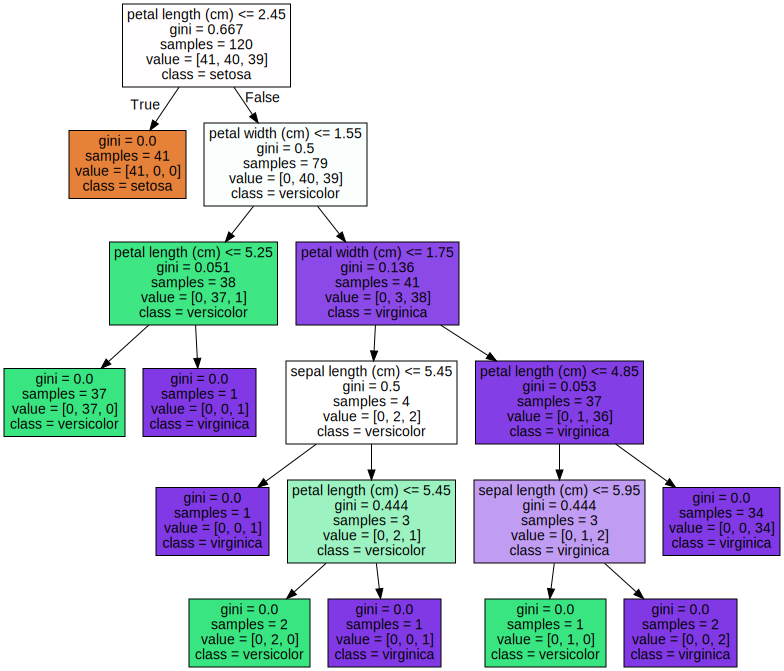

In [3]:
import graphviz
# 위에서 생성된 tree.dot 파일을 Graphviz가 읽어서 주피터 노트북상에서 시각화
with open("tree.dot")as f:
  dot_graph = f.read()
graphviz.Source(dot_graph)
     

* 리프 노드: 더 이상 자식 노드 없음
* 브랜치 노드: 자식 노드 있음
  * 자식 노드 만들기 위한 분할 규칙 조건
     * petal length(cm) >= 2.45와 같이 피처의 조건이 있는 것은 자식 노드를 만들기 위한 규칙 조건. 이 조건이 없으면 리프 노드
     * gini는 다음의 value = []로 주어진 데이터 분포에서의 지니 계수
     * samples는 현 규칙에 해당하는 데이터 건수
     * value = []는 클래스 값 기반의 데이터 건수


Feature importances:
[0.025 0.    0.555 0.42 ]
sepal length (cm): 0.025005
sepal width (cm): 0.000000
petal length (cm): 0.554903
petal width (cm): 0.420092


<Axes: >

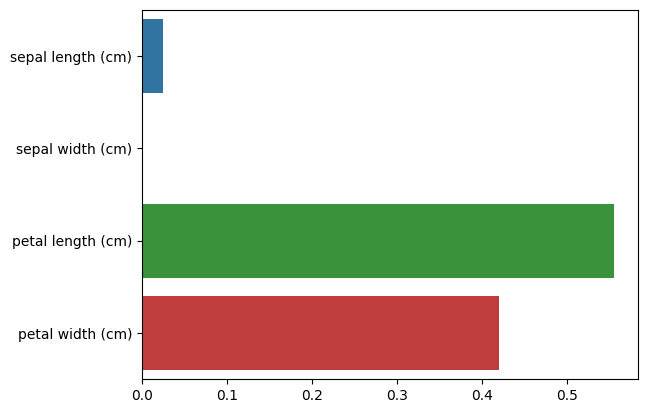

In [4]:
import seaborn as sns
import numpy as np
%matplotlib inline

# feature importance 추출
print("Feature importances:\n{0}".format(np.round(dt_clf.feature_importances_, 3)))

# feature별 importance 매핑
for name, value in zip(iris_data.feature_names, dt_clf.feature_importances_):
  print("{0}: {1:3f}".format(name, value))

# feature importance를 column 별로 시각화하기
sns.barplot(x = dt_clf.feature_importances_, y = iris_data.feature_names)

# 결정 트리 과적합
* make_classification(): 2개의 피처가 3가지 유형의 클래스 값을 가지는 데이터 세트를 만들고 그래프 형태로 시각화/ 호출 시 피처데이터셋, 클래스 레이블데이터셋 반환환

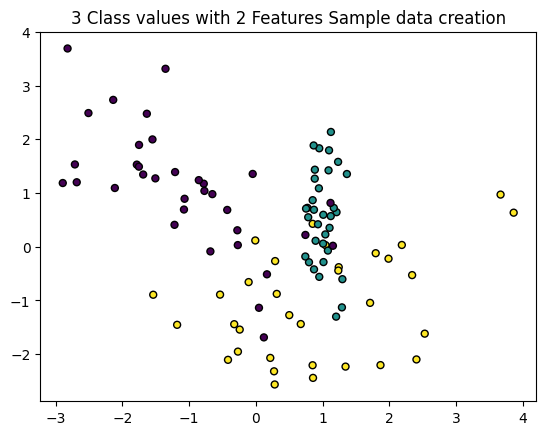

In [5]:

from sklearn.datasets import make_classification
import matplotlib.pyplot as plt
%matplotlib inline

plt.title("3 Class values with 2 Features Sample data creation")

# 2차원 시각화를 위해서 피처는 2개, 클래스는 3가지 유형의 분류 샘플 데이터 생성.
X_features, y_labels = make_classification(n_features = 2, n_redundant = 0, n_informative = 2,
                                           n_classes = 3, n_clusters_per_class = 1, random_state = 0)

# 그래프 형태로 2개의 피처로 2차원 좌표 시각화, 각 클래스 값은 다른 색깔로 표시됨.
plt.scatter(X_features[:, 0], X_features[:, 1], marker = "o", c = y_labels, s = 25, edgecolor = "k")

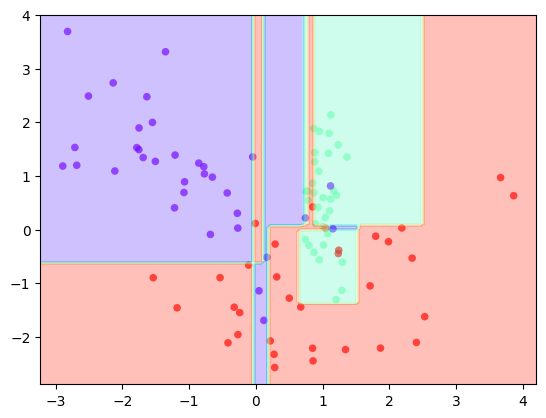

In [7]:
from sklearn.tree import DecisionTreeClassifier

# 특정한 트리 생성 제약 없는 결정 트리의 학습과 결정 경계 시각화.
dt_clf = DecisionTreeClassifier().fit(X_features, y_labels)
visualize_boundary(dt_clf, X_features, y_labels)

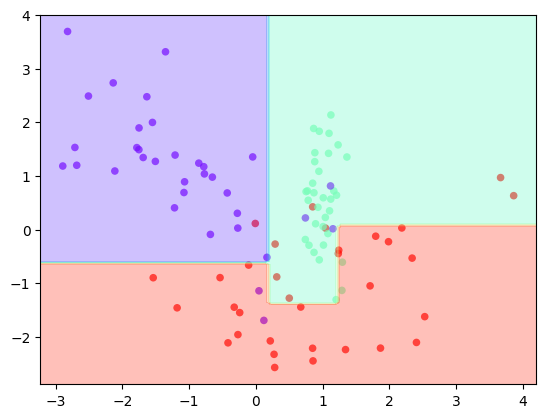

In [8]:
# min_samples_leaf=6 으로 트리 생성 조건을 제약한 Decision Boundary 시각화
dt_clf = DecisionTreeClassifier( min_samples_leaf=6).fit(X_features, y_labels)
visualize_boundary(dt_clf, X_features, y_labels)

# 3. 앙상블 학습: 분류기를 생성하고 예측을 결합해 정확한 예츨 도출 
* 보팅(Voting), 배깅(Bagging): 여러 개의 분류기가 투표를 통해 최종 예측 결과를 결정하는 방식
  * 보팅(Voting) - 일반적으로 서로 다른 알고리즘을 가진 분류기를 결합하는 것
    * 하드 보팅: 다수결과 비슷
    * 소프트 보팅: 분류기들의 레이블 값 결정 확률을 모두 더해 평균하여 확률 가장 높은 값 선정 
    
  * 배깅(Bagging) - 각각의 분류기가 모두 같은 유형의 알고리즘 기반이지만, 데이터 샘플링을 서로 다르게 가져가면서 학습을 수행해 보팅을 수행함. ex) 랜덤 포레스트

* 부트스트래핑(Bootstrappint): 개별 Classifier에게 데이터를 샘플링해서 추출하는 방식

* 부스팅(Boosting): 여러 개의 분류기가 순차적으로 학습을 수행하되, 앞에서 학습한 분류기가 예측이 틀린 데이터에 대해서는 올바르게 예측할 수 있도록 다음 분류기에게는 가중치(weight)를 부여하면서 학습과 예측을 진행 ex) 그래디언트 부스트, XGBoost, LightGBM

In [9]:
# 보팅 분류기, VotingClassifier 클래스
# 로지스틱 회귀, KNN 기반 보팅 분류기

import pandas as pd

from sklearn.ensemble import VotingClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

cancer = load_breast_cancer()

data_df = pd.DataFrame(cancer.data, columns = cancer.feature_names)
data_df.head(3)

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst radius,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension
0,17.99,10.38,122.8,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,...,25.38,17.33,184.6,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,20.57,17.77,132.9,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,...,24.99,23.41,158.8,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,19.69,21.25,130.0,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,...,23.57,25.53,152.5,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758


In [10]:
# 개별 모델은 로지스틱 회귀와 KNN임.
lr_clf = LogisticRegression()
knn_clf = KNeighborsClassifier(n_neighbors = 8)

# 개별 모델을 소프트 보팅 기반의 앙상블 모델로 구현한 분류기
vo_clf = VotingClassifier(estimators = [("LR", lr_clf), ("KNN", knn_clf)], voting = "soft")

X_train, X_test, y_train, y_test = train_test_split(cancer.data, cancer.target,
                                                    test_size = 0.2, random_state = 156)

# VotingClassifier 학습/예측/평가.
vo_clf.fit(X_train, y_train)
pred = vo_clf.predict(X_test)
print("Voting 분류기 정확도: {0:.4f}".format(accuracy_score(y_test, pred)))


# 개별 모델의 학습/예측/평가
classifiers = [lr_clf, knn_clf]
for classifier in classifiers:
  classifier.fit(X_train, y_train)
  pred = classifier.predict(X_test)
  class_name = classifier.__class__.__name__
  print("{0} 정확도: {1:4f}".format(class_name, accuracy_score(y_test, pred)))

Voting 분류기 정확도: 0.9474
LogisticRegression 정확도: 0.938596
KNeighborsClassifier 정확도: 0.938596


# 4. 랜덤 포레스트: 여러개의 결정 트리 분류기가 전체 데이터에서 배깅 방식으로 각자의 데이터를 샘플링해 개별적으로 학습 수행, 최종 보팅을 통해 예측 결정

In [15]:
# 중복된 feature명을 변경하고 새로운 feature명을 가지는 df를 반환하는 함수 정의하기
def get_new_feature_name_df(old_feature_name_df):
    feature_dup_df = pd.DataFrame(data = old_feature_name_df.groupby('column_name').cumcount(),
                                  columns=['dup_cnt'])
    feature_dup_df = feature_dup_df.reset_index()
    new_feature_name_df = pd.merge(old_feature_name_df.reset_index(), feature_dup_df, how = 'outer')
    new_feature_name_df['column_name'] = new_feature_name_df[['column_name', 'dup_cnt']].apply(lambda x : x[0] + '_' + str(x[1]) 
                                                                                         if x[1] > 0 else x[0],  axis = 1)
    new_feature_name_df = new_feature_name_df.drop(['index'], axis = 1) # 해당 열 삭제
    return new_feature_name_df

In [ ]:
import pandas as pd

### 데이터셋을 가공하기 위한 함수
def get_human_dataset( ):
    # 각 데이터 파일들은 공백으로 분리되어 있으므로 read_csv에서 공백 문자를 sep으로 할당.
    feature_name_df = pd.read_csv('features.txt', sep = '\s+', header = None, names = ['column_index','column_name'])
    
    # 중복된 피처명을 수정하는 get_new_feature_name_df()를 이용, 신규 피처명 DataFrame생성. 
    new_feature_name_df = get_new_feature_name_df(feature_name_df)
    
    # DataFrame에 피처명을 컬럼으로 부여하기 위해 리스트 객체로 다시 변환
    feature_name = new_feature_name_df.iloc[:, 1].values.tolist()
    
    # 학습 피처 데이터 셋과 테스트 피처 데이터을 DataFrame으로 로딩. 컬럼명은 feature_name 적용
    X_train = pd.read_csv('X_train.txt',
                          sep = '\s+', names = feature_name )
    X_test = pd.read_csv('X_test.txt',
                         sep = '\s+', names = feature_name)
    
    # 학습 레이블과 테스트 레이블 데이터을 DataFrame으로 로딩하고 컬럼명은 action으로 부여
    y_train = pd.read_csv('y_train.txt',
                          sep = '\s+',header = None, names = ['action'])
    y_test = pd.read_csv('y_test.txt',
                         sep = '\s+',header = None, names = ['action'])
    
    # 로드된 학습/테스트용 DataFrame을 모두 반환 
    return X_train, X_test, y_train, y_test

from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
import pandas as pd
import warnings
warnings.filterwarnings('ignore')

# 결정 트리에서 사용한 get_human_dataset( )을 이용해 학습/테스트용 DataFrame 반환
X_train, X_test, y_train, y_test = get_human_dataset()

# 랜덤 포레스트 학습 및 별도의 테스트 셋으로 예측 성능 평가
rf_clf = RandomForestClassifier(random_state = 0)
rf_clf.fit(X_train , y_train)
pred = rf_clf.predict(X_test)
accuracy = accuracy_score(y_test , pred)
print('랜덤 포레스트 정확도: {0:.4f}'.format(accuracy))
     

# 랜덤 포레스트 하이퍼 파라미터 및 튜닝



In [17]:
from sklearn.model_selection import GridSearchCV

params={
    'n_estimators':[100],
    'max_depth':[6,8,10,12],
    'min_samples_leaf':[8,12,18],
    'min_samples_split':[8,16,20]
}

# RandomForestClassifier 객체 생성 후 GridSearchCV 수행
rf_clf=RandomForestClassifier(random_state=0, n_jobs=1)
grid_cv=GridSearchCV(rf_clf, param_grid=params, cv=2, n_jobs=-1)
grid_cv.fit(X_train, y_train)

print('최적 하이퍼 파라미터:\n',grid_cv.best_params_)
print('최고 예측 정확도: {0:.4f}'.format(grid_cv.best_score_))

최적 하이퍼 파라미터:
 {'max_depth': 6, 'min_samples_leaf': 8, 'min_samples_split': 8, 'n_estimators': 100}
최고 예측 정확도: 0.9451


In [ ]:
rf_clf1 = RandomForestClassifier(n_estimators=300, max_depth=10, min_samples_leaf=8, \
                                 min_samples_split=8, random_state=0)
rf_clf1.fit(X_train, y_train)
pred = rf_clf1.predict(X_test)
print('예측 정확도: {0:.4f}'.format(accuracy_score(y_test, pred)))

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

ftr_importances_values = rf_clf1.feature_importances_
ftr_importances = pd.Series(ftr_importances_values, index=X_train.columns)
ftr_top20 = ftr_importances.sort_values(ascending=False)[:20]

plt.figure(figsize=(8,6))
plt.title('Feature importances Top 20')
sns.barplot(x=ftr_top20, y=ftr_top20.index)
plt.show()

# 5.GBM
* 부스팅 알고리즘: 여러 개의 약한 학습기(weak learner)를 순차적으로 학습, 예측하며 잘못 예측한 데이터에 가중치 부여를 통해 오류를 개선해 나가면서 학습하는 방식 ex. 에이다부스트(AdaBoost), 그래디언트부스트

 * Step 1: 첫 번째 약한 학습기(weak learner)가 분류 1로 +와 -를 분류

 * Step 2 : 이 오류 데이터에 대해서 가중치 값 부여

 * Step 3 : 두 번째 약한 학습기가 분류 기준 2로 +와 -를 분류

 * Step 4 : 잘못된 분류된 이 - 오류 데이터에 대해 다음 약한 학습기가 잘 분류할 수 있게 더 큰 가중히 부여

 * Step 5 : 세 번째 약한 학습기가 분류 기준 3으로 +와 -를 분류

 * Step 6 : 첫 번째, 두 번째, 세 번째 약한 학습기 모두 결합한 결과 예측

* GBM(Gradient Boosti Machine): 에이다부스트와 유사하나, 가중치 업데이트를 경사 하강법(Gradient Descent)을 이용하는 것이 큰 차이

* 경사 하강법(Gradient Descent): 오류식 h(x)=y-F(x)(실제값-예측값)를 최소화하는 방향성을 가지고 반복적으로 가중치 값을 업데이트 하는 것


In [ ]:
# GBM은 CART 기반의 다른 알고리즘과 마찬가지로 분류와 회귀 가능, GradientBoostingClassifier 클래스 제공

from sklearn.ensemble import GradientBoostingClassifier
import time
import warnings
warnings.filterwarnings('ignore')

X_train, X_test, y_train, y_test = get_human_dataset()

#GBM 수행 시간 측정을 위함 시작 시간 설정
start_time = time.time()

gb_clf = GradientBoostingClassifier(random_state=0)
gb_clf.fit(X_train, y_train)
gb_pred = gb_clf.predict(X_test)
gb_accuracy = accuracy_score(y_test, gb_pred)

print('GBM 정확도: {0:.4f}'.format(gb_accuracy))
print('GBM 수행 시간: {0:.1f}초'.format(time.time() - start_time))

# GBM 하이퍼 파라미터 및 튜닝

In [ ]:
from sklearn.model_selection import GridSearchCV

params = {
    'n_estimators':[100,500],
    'learning_rate':[0.05,0.1]
}
grid_cv = GridSearchCV(gb_clf, param_grid=params, cv=2, verbose=1)
grid_cv.fit(X_train, y_train)
print('최적 하이퍼 파라미터:\n', grid_cv.best_params_)
print('최고 예측 정확도: {0:.4f}'.format(grid_cv.best_score_))

#GridSearchCV를 이용해 최적으로 학습된 estimator로 예측 수행
gb_pred = grid_cv.best_estimator_.predict(X_test)
gb_accuracy = accuracy_score(y_test, gb_pred)
print('GBM 정확도: {0:.4f}'.format(gb_accuracy))